### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Purpose
We will analyse data to provide insights that will help Turtle Games with its business objective to "improve overall sales performance by utilising cutomer trends".

# Approach
Turtle Games provided us with two data sets, and metadata for the two data sets combined in a text file.

The data set file names are:\
`'turtle_reviews.csv'`\
`'turtle_sales.csv'`

We will analyse the data over the following six weeks. Each week we will focus on one of the initial set of six questions that Turtle Games has come up with to break down their overall business objective of improving sales.

The six questions as provided by Turtle Games are:
1.	How do customers accumulate loyalty points?
2.	How can groups within the customer base be used to target specific market segments?
3.	How can social data (e.g., customer reviews) be used to inform marketing campaigns?
4.	What is the impact of each product on sales?
5.	How reliable is the data? (e.g., normal distribution, skewness, or kurtosis)
6.	What is the relationship(s) between North American, European, and global sales?

We will collaborate as a team of data analysts using a GitHub repository.

In addition to our code, our repository includes the data and metadata files.

# Week 1

### Import the necessary libraries and packages
Our choice of libraries and packages is based on the goals for the week.

In [1]:
# Import libraries and packages necessary for linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

## Week 1 | Goals
1. Data is understood and cleaned
2. How customers accumulate loyalty points is understood

Only the data in `'turtle_reviews.csv'` is relevant to the goals for week 1.

### Week 1 | Goal 1
Data is understood and cleaned

#### Week 1 | Goal 1 | Step 1
Load the data

In [2]:
# Load 'turtle_reviews.csv' and create DataFrame.
df_reviews = pd.read_csv('turtle_reviews.csv')

#### Week 1 | Goal 1 | Step 2
Explore the data
1. Understand what the data represents
2. Check for missing values

###### Information in 'metadata_turtle_games.txt'


| # | Column name | What the column represents |
| - | :--------------------------- | :---------------------------------------------------------------------- |
| 0 | `'gender'` | gender of the customer|
| 1 | `'age'` | age of the customer in years |
| 2 | `'remuneration (k£)'` | customer's total annual income in thousands of £|
| 3 | `'spending_score (1-100)'` | score assigned by Turtle Games based on the customer's spending nature and behaviour |
| 4 | `'loyalty_points'` | score assigned by Turtle Games based on monetary value of purchases |
| 5 | `'education'` | highest level of education obtained by the customer |
| 6 | `'language'` | all reviews were in English |
| 7 | `'platform'` | all reviews were obtained through the Turtle Games website |
| 8 | `'product'` | code for the product based on its description |
| 9 | `'review'` | text from reviews by customers on the products they purchased and used |
| 10 | `'summary'` | summary of customer's review |


In [3]:
# View the first five rows of df_reviews.
df_reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# View information about df_reviews.
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


###### Comment on data types
Based on the description in the metadata text file (see below for summary), the data type for all columns seems reasonable with the exception of the column `'product'` (representing the product code) which we could change from `int64` to `object`.

In [5]:
# Change the data type of 'product' from integer to object.
df_reviews = df_reviews.astype({'product': object})

In [6]:
# Check data type change was done.
df_reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                    object
review                     object
summary                    object
dtype: object

##### Check for missing values
Missing values can affect the results of our analysis in unexpected and undesired ways.

We've already seen from running the `.info()` method that there are no missing values in our data because for all columns all 2000 records show `'No-Null Count'`.

###### Additional check for missing values
We could run an additional check using the `isnull()` method on each of the columns as per the example in the code snippet below.

In [7]:
# Additional check for missing values.
df_reviews[df_reviews['gender'].isnull()]

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


###### Comment on missing values

The code snippet above would have returned the rows where `'gender'` had no value. No rows were returned, meaning there are no missing values in the column `'gender'`.

The same result is returned for each of the other ten columns.

To keep this notebook short we deleted the check for the ten columns.

In [8]:
# View summary of descriptive statistics.
df_reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


###### Summary of what we see from exploring the data in `df_reviews`
From looking at the:
- metadata text file
- top five rows of the DataFrame
- return from applying the `.info()` method
- check for missing values
- summary of descriptive statistics

we see that:
- each row in `'turtle_reviews.csv'` gives information for each of 2,000 individual customers
- there are no missing values
- the range of values in each column seems reasonable
- the `'language'` column may be redundant given all review comments are in English
- the `'platform'` column may be redundant given all review comments were obtained from the Turtle Games website

#### Week 1 | Goal 1 | Step 3
Remove redundant columns and export to `csv`

In [9]:
# Remove the redunctant columns - 'language' and 'platform'.
df_reviews = df_reviews.drop(columns=['language', 'platform'])

In [10]:
# Change the columns names to names easier to reference.
df_reviews = df_reviews.rename(
    columns={'remuneration (k£)': 'remuneration',
            'spending_score (1-100)': 'spending_score',
            'product': 'product_code',
            'review': 'review_full_text',
            'summary': 'review_summary'})

In [11]:
# Check removal and rename of columns done as expected.
df_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product_code,review_full_text,review_summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# Write the cleaned data to a csv file.
df_reviews.to_csv('turtle_reviews_clean.csv')

In [13]:
# Import the cleaned data from the new csv file.
df_reviews_clean = pd.read_csv('turtle_reviews_clean.csv')

In [14]:
# View first five rows of the cleaned DataFrame.
df_reviews_clean.head()

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product_code,review_full_text,review_summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [15]:
# Change the data type of 'product_code' from integer to object.
df_reviews_clean = df_reviews_clean.astype({'product_code': object})

In [16]:
# Drop the column 'Unnamed: 0'.
df_reviews_clean = df_reviews_clean.drop(columns='Unnamed: 0')

In [17]:
# Sense-check shape.
df_reviews_clean.shape

(2000, 9)

In [18]:
# Sense-check info.
df_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   age               2000 non-null   int64  
 2   remuneration      2000 non-null   float64
 3   spending_score    2000 non-null   int64  
 4   loyalty_points    2000 non-null   int64  
 5   education         2000 non-null   object 
 6   product_code      2000 non-null   object 
 7   review_full_text  2000 non-null   object 
 8   review_summary    2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


###### Sense-check results
The shape and metadata are as expected.

###### Questions remaining at the end of out data exploration and cleaning

1. What are the controls in place to ensure the accuracy, completeness, and validity of the data in `'turtle_reviews.csv'`?



2. How were the 2,000 customers selected?



3. What other columns are available and relevant to our analysis, but not included in `df_reviews`?



4. The metadata describes `'spending_score'` as 'a score (between 1 and 100) assigned to each customer based on the customer's spending nature and behaviour'.\
How are 'spending nature' and 'spending behaviour' measured?\
How is `'spending_score'` mapped to 'spending nature' and spending behaviour' measures?\
Are spending scores comparable across customers?



5. The metadata describes `'loyalty_points'` as 'a score based on the point value of the purchase'.\
How are `'loyalty_points'` mapped to 'purchase value' (for example, is it one loyalty point per £1 of purchase)?

### Week 1 | Goal 2
How customers accumulate loyalty points is understood

#### Understanding the question
The question as expressed by Tutle Games is
> 'How do customers accummulate loyalty points?'

One way to reformulate and break down the question is
> Does the number of loyalty points accummulated by customers depend on or vary in line with the customer's (1) `'age'`, (2) `'remuneration'`, or (3) `'spending_score'`?

To begin towards answering the question we will assess the degree to which there may be a linear relationship between loayalty points as the dependent variable and each of `'age'`, `'remuneration'` and `'spending_score'` as the independent variables.

In [19]:
# View the correlation between each pair of variables.
df_reviews_clean.corr()

,age,remuneration,spending_score,loyalty_points
age,1.000000,-0.005708,-0.224334,-0.042445
remuneration,-0.005708,1.000000,0.005612,0.616065
spending_score,-0.224334,0.005612,1.000000,0.672310
loyalty_points,-0.042445,0.616065,0.672310,1.000000


### (1) Relationship between customer `'age'` and `'loyalty_points'`

In [20]:
# Define the independent variable.
y = df_reviews_clean['loyalty_points']

# Define the dependent variable.
x = df_reviews_clean['age']

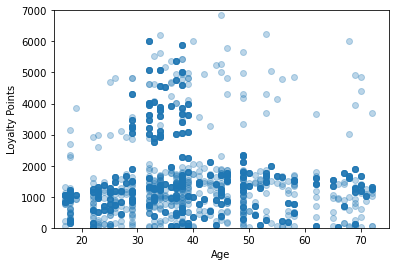

In [21]:
# Visualise the scatterplot of 'age' and 'loyalty_points'.
plt.scatter(x, y, alpha = .3) 
"""To see the concentration of data points,
set alpha (data point transparency) at 0.3."""

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(15,75)

# Label the axes.
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [22]:
# Create the OLS model.
f = 'y ~ x'
test = ols(f, data = df_reviews_clean).fit()

In [23]:
# View the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Tue, 27 Dec 2022   Prob (F-statistic):             0.0577
Time:                        20:08:06   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64


In [25]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64


In [26]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [27]:
# Create the linear regression model.
# Set the coefficient and the constant equal to the estimated parameters.
y_pred = (1736.517739) + (-4.012805) * df_reviews_clean['age']

In [28]:
# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

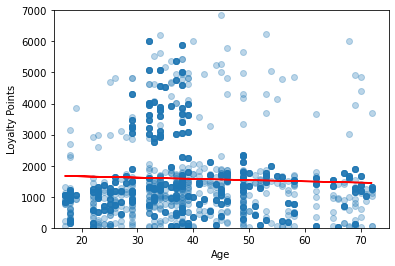

In [29]:
# Plot the graph with a regression line.
plt.scatter(x, y, alpha = .3)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(15,75)

# Label the axes.
plt.xlabel('Age')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [30]:
# Define test to see whether the homoskedasticity assumption is met.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [31]:
# Run homoskedasticity test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 13.045150861307864, 'LM Test p-value': 0.00030407066519247704, 'F-stat': 13.117666680846478, 'F-test p-value': 0.0002998192355800465}


**Comments**\
*Homoskedastiity / homogeneity of variance*\
The `'LM-test p-value'` is less than 5% and therefore we cannot accept that the homoskedasticity assumption is met. This means that the variance of the outcome variable (`'loyalty_points'`) is not stable at all levels of the predictor variable (`'age'`).

*Linearity*\
The amount of variance in `'loyalty_points'` explained by the linear model we fit to the data is 0.2% (`'R-squared'` is 0.002). Therefore the linearity assumption seems not to be met either.

Looking at the scatterplot and the density of the data points for the age range 30 to 40, loyalty points may peak at ages 30 to 40.

After our presentation to our stakeholders at Turtle Games of our initial data analysis results we will consider performing additional analysis to identify a non-linear model that may be a good fit to our data.  

### (2) Relationship between customer `'remuneration'` and `'loyalty_points'`

In [32]:
# Define the independent variable.
y = df_reviews_clean['loyalty_points']

# Define the dependent variable.
x = df_reviews_clean['remuneration']

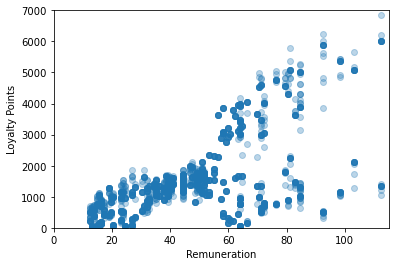

In [33]:
# Visualise the scatterplot of 'remuneration' and 'loyalty_points'.
plt.scatter(x, y, alpha = .3)
"""To see concentration of data points,
set alpha (data point transparency) at 0.3."""

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0,115)

# Label the axes.
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [34]:
# Create the OLS model.
f = 'y ~ x'
test = ols(f, data = df_reviews_clean).fit()

In [35]:
# View the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        20:08:07   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64


In [37]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64


In [38]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [39]:
# Create the linear regression model.
# Set the coefficient and the constant equal to the estimated parameters.
y_pred = (-65.686513) + (34.187825) * df_reviews_clean['remuneration']

In [40]:
# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

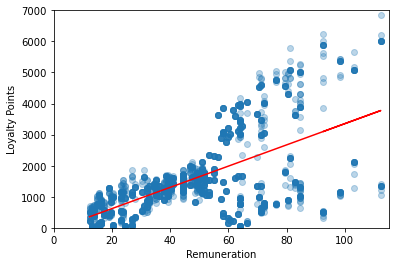

In [41]:
# Plot the graph with a regression line.
plt.scatter(x, y, alpha = .3)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0,115)

# Label the axes.
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [42]:
# Define test to see whether the homoskedasticity assumption is met.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [43]:
# Run homoskedasticity test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1038.6445487288283, 'LM Test p-value': 7.153051772822205e-228, 'F-stat': 2158.6311344219325, 'F-test p-value': 3.68e-320}


**Comments**\
*Homoskedastiity / homogeneity of variance*\
The `'LM-test p-value'` is less than 5% and therefore we cannot accept that the homoskedasticity assumption is met. This means that the variance of the outcome variable (`'loyalty_points'`) is not stable at all levels of the predictor variable (`'remuneration'`).

We could apply a transformation to our data to address the heteroskedasticity issue. We will consider whether to do this after our presentation to our stakeholders at Turtle Games of our initial data analysis results.  

*Amount of variance explained by our model*\
With the caveat of the heteroskedasticity issue which might affect the reliability of our liner regression, the amount of variance in `'loyalty_points'` explained by the linear model we fit to the data is 38% (`'R-squared'` is 0.38).

### (3) Relationship between customer `'spending_score'` and `'loyalty_points'`

In [44]:
# Define the independent variable.
y = df_reviews_clean['loyalty_points']

# Define the dependent variable.
x = df_reviews_clean['spending_score']

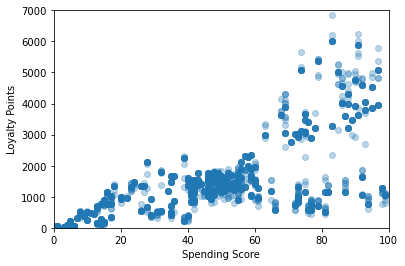

In [45]:
# Visualise the scatterplot of 'spending_score' and 'loyalty_points'.
plt.scatter(x, y, alpha = .3)
"""To see concentration of data points,
set alpha (data point transparency) at 0.3."""

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0, 100)

# Label the axes.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [46]:
# Create the OLS model.
f = 'y ~ x'
test = ols(f, data = df_reviews_clean).fit()

In [47]:
# View the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        20:08:07   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64


In [49]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64


In [50]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [51]:
# Create the linear regression model.
# Set the coefficient and the constant equal to the estimated parameters.
y_pred = (-75.052663) + (33.061693) * df_reviews_clean['spending_score']

In [52]:
# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

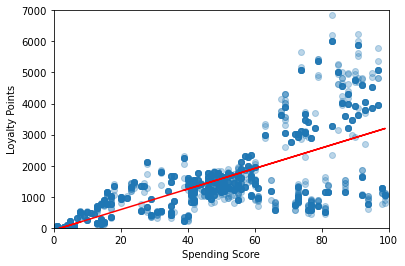

In [53]:
# Plot the graph with a regression line.
plt.scatter(x, y, alpha = .3)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the y and x limits on the axes.
plt.ylim(0, 7000)
plt.xlim(0, 100)

# Label the axes.
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

In [54]:
# Define test to see whether the homoskedasticity assumption is met.
test = sms.het_breuschpagan(test.resid, test.model.exog)

In [55]:
# Run homoskedasticity test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 629.9823360215933, 'LM Test p-value': 5.042699614937062e-139, 'F-stat': 918.7507142907773, 'F-test p-value': 2.3037887924468668e-166}


**Comments**\
*Homoskedastiity / homogeneity of variance*\
The `'LM-test p-value'` is less than 5% and therefore we cannot accept that the homoskedasticity assumption is met. This means that the variance of the outcome variable (`'loyalty_points'`) is not stable at all levels of the predictor variable (`'spending_score'`).

We could apply a transformation to our data to address the heteroskedasticity issue. We will consider whether to do this after our presentation to our stakeholders at Turtle Games of our initial data analysis results.  

*Amount of variance explained by our model*\
With the caveat of the heteroskedasticity issue which might affect the reliability of our liner regression, the amount of variance in `'loyalty_points'` explained by the linear model we fit to the data is 45.2% (`'R-squared'` is 0.452).

# Week 2

In [56]:
# Import additional necessary libraries.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

## Week 2 | Goal
Identify insights that may help the marketing department at Turtle Games to group customers for the purposes of target marketing. 

We will continue working with the cleaned data in `'turtle_reviews.csv'`.

#### Week 2 | Step 1
Load the data and drop columns not needed.

In [57]:
# Load the CSV file with the clean data from week 1.
df_reviews_clustering = pd.read_csv('turtle_reviews_clean.csv')

In [58]:
# View DataFrame information.
df_reviews_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2000 non-null   int64  
 1   gender            2000 non-null   object 
 2   age               2000 non-null   int64  
 3   remuneration      2000 non-null   float64
 4   spending_score    2000 non-null   int64  
 5   loyalty_points    2000 non-null   int64  
 6   education         2000 non-null   object 
 7   product_code      2000 non-null   int64  
 8   review_full_text  2000 non-null   object 
 9   review_summary    2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [59]:
# Drop unnecessary columns.
df_reviews_clustering = df_reviews_clustering.drop(columns=[
    'Unnamed: 0',
    'gender',
    'age',
    'loyalty_points',
    'education',
    'product_code',
    'review_full_text',
    'review_summary'])

In [60]:
# View DataFrame information.
df_reviews_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


#### Week 2 | Step 2
Explore the data.

In [61]:
# Descriptive statistics.
df_reviews_clustering.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


#### Week 2 | Step 3
Plot the data.

Text(0, 0.5, 'Spending Score - 1-100')

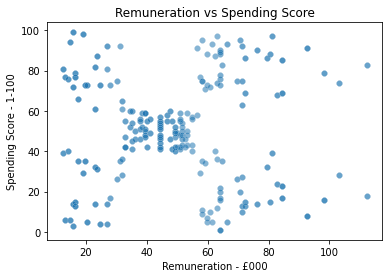

In [62]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                alpha=0.1,
                data = df_reviews_clustering)

plt.title('Remuneration vs Spending Score')
plt.xlabel('Remuneration - £000')
plt.ylabel('Spending Score - 1-100')

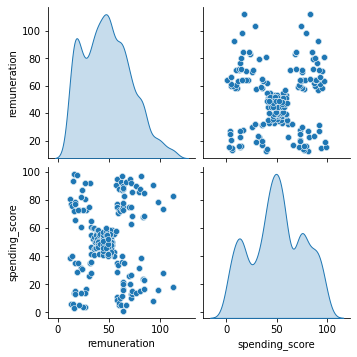

In [63]:
# Create a pairplot with Seaborn.
x = df_reviews_clustering[['remuneration', 'spending_score']]

sns.pairplot(df_reviews_clustering,
            vars = x,
            diag_kind = 'kde')

#### Week 2 | Step 4
Determine the number of clusters using the Elbow method.

In [64]:
# Prepare an elbow chart.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                   init = 'k-means++',
                   max_iter = 300,
                   n_init = 10,
                   random_state = 0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

Text(0, 0.5, 'SS Distance')

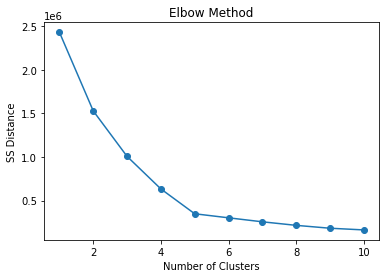

In [65]:
# Plot the elbow chart.
plt.plot(range(1,11),
        ss,
        marker = 'o')

plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SS Distance")

#### Week 2 | Step 5
Determine the number of clusters using the Silhouette method.

In [66]:
# Prepare a silhouette chart.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

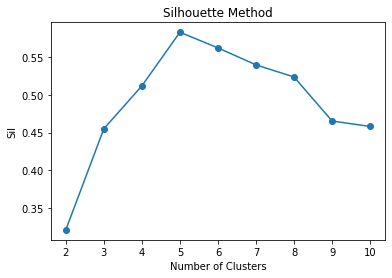

In [67]:
# Plot the silhouette chart.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sil")

plt.show()

#### Week 2 | Step 6
Evaluate the k-means model at different values of k.

**Five clusters**

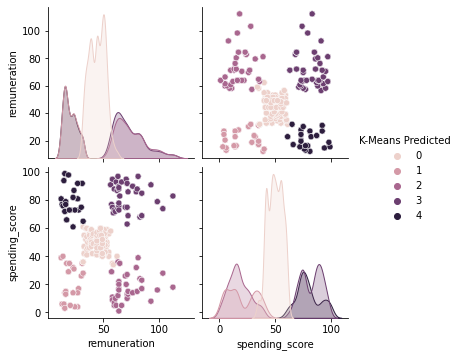

In [68]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [69]:
# Check the number of observations per predicted class for five clusters.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [70]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


**Three clusters**

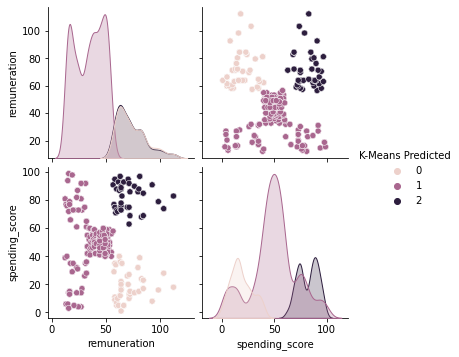

In [71]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [72]:
# Check the number of observations per predicted class for three clusters.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

In [73]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  1
2         13.12               6                  1
3         13.12              77                  1
4         13.94              40                  1


**Seven clusters**

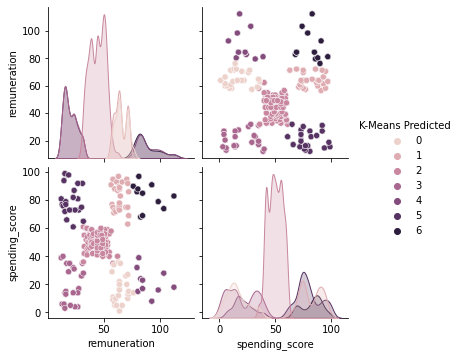

In [74]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [75]:
# Check the number of observations per predicted class for seven clusters.
x['K-Means Predicted'].value_counts()

2    767
3    271
5    269
1    227
0    214
6    129
4    123
Name: K-Means Predicted, dtype: int64

In [76]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


#### Week 2 | Step 7
Choose model.

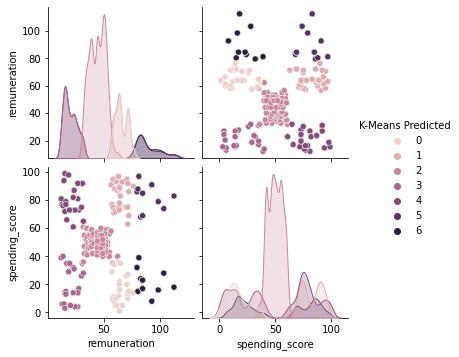

In [77]:
# Apply the final model.
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 20000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted clusters.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [78]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
4    269
1    238
0    214
6    123
5    118
Name: K-Means Predicted, dtype: int64

#### Week 2 | Step 8
Plot and interpret the clusters.

Text(0, 0.5, 'Remuneration - £000')

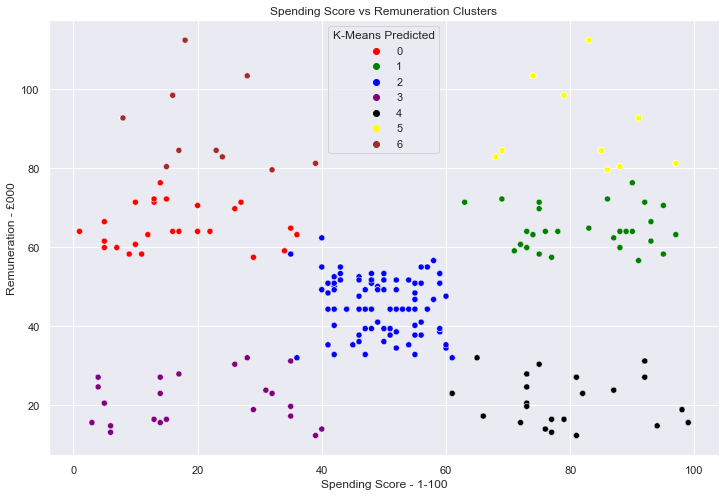

In [79]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x = 'spending_score' , 
                y ='remuneration',
                data = x,
                hue = 'K-Means Predicted',
                palette=['red', 'green', 'blue', 'purple', 'black', 'yellow', 'brown'])

plt.title("Spending Score vs Remuneration Clusters")
plt.xlabel("Spending Score - 1-100")
plt.ylabel("Remuneration - £000")

In [80]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
4    269
1    238
0    214
6    123
5    118
Name: K-Means Predicted, dtype: int64

In [81]:
# View the DataFrame information.
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   remuneration       2000 non-null   float64
 1   spending_score     2000 non-null   int64  
 2   K-Means Predicted  2000 non-null   int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 39.2 KB


In [82]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3


#### Week 2 | Step 9
*Insights*

Choosing the number of clusters is a key subject for discussion with the Turtle Games marketing department and other key stakeholders.

From the elbow and silhouette methods five clusters seems optimal given the location of where the elbow and the silhouette peak seem most pronounced.

However, looking at the scatterplot for seven clusters we can envisage a marketting strategy whereby customers could be classified into:

| Cluster | Spending Score | Remuneration | Number of Customers | Percentage of Customers |
| :-------------- | :-------------- | :-------------- | :-------------- | :-------------- |
| Purple - 6 | Low | Low | 123 | 6% |
| Black - 4 | High | Low | 269 | 13% |
| Blue - 2 | Medium | Medium-Low | 767 | 38% |
| Red - 0 | Low | Medium-High | 214 | 11% |
| Green - 1 | High | Medium-High | 238 | 12% |
| Brown - 3 | Low | High | 271 | 14% |
| Yellow - 5 | High | High | 118 | 6% |

*Questions to explore*

1. Are the 2,000 customers in our data set from the same country / city or countries / cities with comparable cost of living? The optimal clusters for different countries may differ. 
2. How is the spending score calculated? For example, over which period and taking into account which products? Does it take into account sales volume as well as profit margin?

# Week 3

# Week 4

# Week 5

# Week 6